<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Boston-Housing-Dataset" data-toc-modified-id="Boston-Housing-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Boston Housing Dataset</a></span></li><li><span><a href="#Preparing-the-data" data-toc-modified-id="Preparing-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparing the data</a></span><ul class="toc-item"><li><span><a href="#Normalizing-the-data" data-toc-modified-id="Normalizing-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Normalizing the data</a></span></li></ul></li><li><span><a href="#Building-the-network" data-toc-modified-id="Building-the-network-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building the network</a></span><ul class="toc-item"><li><span><a href="#Model-definition" data-toc-modified-id="Model-definition-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Model definition</a></span></li></ul></li><li><span><a href="#Validating-our-approach-using-the-k-fold-validation" data-toc-modified-id="Validating-our-approach-using-the-k-fold-validation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Validating our approach using the k-fold validation</a></span><ul class="toc-item"><li><span><a href="#Saving-the-validation-logs-at-each-fold" data-toc-modified-id="Saving-the-validation-logs-at-each-fold-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Saving the validation logs at each fold</a></span></li></ul></li><li><span><a href="#Building-the-history-of-successive-mean-k-fold-validation-scores" data-toc-modified-id="Building-the-history-of-successive-mean-k-fold-validation-scores-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Building the history of successive mean k-fold validation scores</a></span></li><li><span><a href="#Plotting-validation-scores" data-toc-modified-id="Plotting-validation-scores-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plotting validation scores</a></span><ul class="toc-item"><li><span><a href="#Plotting-validation-scores,-excluding-the-first-10-data-points" data-toc-modified-id="Plotting-validation-scores,-excluding-the-first-10-data-points-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plotting validation scores, excluding the first 10 data points</a></span></li></ul></li><li><span><a href="#Training-the-final-model" data-toc-modified-id="Training-the-final-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Training the final model</a></span></li><li><span><a href="#key-Takeaways" data-toc-modified-id="key-Takeaways-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>key Takeaways</a></span></li></ul></div>

# Goal

In this notebook, we will attempt to predict the median price of homes in a given Boston suburb in the mid-1970, given data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.


# Boston Housing Dataset

In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

The prices are typically between \$10000 and \$50000. The targets are the median values of owner-occupied homes, in thousands of dollars.

In [5]:
print(train_targets)

[ 15.2  42.3  50.   21.1  17.7  18.5  11.3  15.6  15.6  14.4  12.1  17.9
  23.1  19.9  15.7   8.8  50.   22.5  24.1  27.5  10.9  30.8  32.9  24.
  18.5  13.3  22.9  34.7  16.6  17.5  22.3  16.1  14.9  23.1  34.9  25.
  13.9  13.1  20.4  20.   15.2  24.7  22.2  16.7  12.7  15.6  18.4  21.
  30.1  15.1  18.7   9.6  31.5  24.8  19.1  22.   14.5  11.   32.   29.4
  20.3  24.4  14.6  19.5  14.1  14.3  15.6  10.5   6.3  19.3  19.3  13.4
  36.4  17.8  13.5  16.5   8.3  14.3  16.   13.4  28.6  43.5  20.2  22.
  23.   20.7  12.5  48.5  14.6  13.4  23.7  50.   21.7  39.8  38.7  22.2
  34.9  22.5  31.1  28.7  46.   41.7  21.   26.6  15.   24.4  13.3  21.2
  11.7  21.7  19.4  50.   22.8  19.7  24.7  36.2  14.2  18.9  18.3  20.6
  24.6  18.2   8.7  44.   10.4  13.2  21.2  37.   30.7  22.9  20.   19.3
  31.7  32.   23.1  18.8  10.9  50.   19.6   5.   14.4  19.8  13.8  19.6
  23.9  24.5  25.   19.9  17.2  24.6  13.5  26.6  21.4  11.9  22.6  19.6
   8.5  23.7  23.1  22.4  20.5  23.6  18.4  35.2  23.1 

# Preparing the data

## Normalizing the data

In [6]:
mean = train_data.mean(axis=0)
mean.shape

(13,)

In [7]:
train_data -= mean

In [8]:
std = train_data.std(axis=0)

In [9]:
train_data /= std

In [10]:
test_data -= mean
test_data /= std

- The quantities used for normalizing the test data are computed using the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.

# Building the network

## Model definition

In [11]:
from keras import models
from keras import layers

In [12]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', 
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

**MAE**: Mean Absolute Error is the absolute difference between the predictions and the targets.

# Validating our approach using the k-fold validation

In [13]:
import numpy as np

In [14]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [15]:
for i in range(k):
    print("Processing fold #", i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples], 
             train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples], 
             train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs,
              batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [16]:
all_scores

[2.0795102272883499,
 2.1256098487589621,
 2.9143614910616735,
 2.4292112671502748]

In [17]:
np.mean(all_scores)

2.387173208564815

The average mean absolute error of 2.4 means that we are off by \$2400 on average whihc is significant considering that the prices range from \$10000 to \$50000.

## Saving the validation logs at each fold 

In [18]:
num_epochs = 500
all_mae_histories = []

In [19]:
for i in range(k):
    print("Processing fold #", i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples], 
             train_data[(i + 1) * num_val_samples:]], axis=0)
    
    partial_train_targets = np.concatenate(
            [train_targets[:i * num_val_samples], 
             train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs,
              validation_data = (val_data, val_targets), 
              batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


# Building the history of successive mean k-fold validation scores

In [20]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

# Plotting validation scores

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

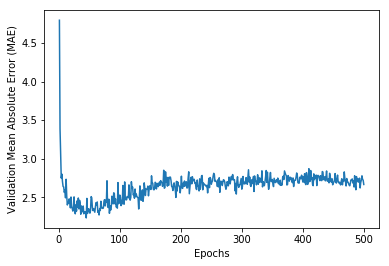

In [24]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Mean Absolute Error (MAE)')
plt.show()

It may be a little difficult to see the plot, due to scaling issues and relatively high variance. 

- Omit the first 10 points, which are on a different scale than the rest of the curve.
- Replace each point with an exponential moving average of the previous points to obtain a smooth curve. 

## Plotting validation scores, excluding the first 10 data points

In [26]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [27]:
smooth_mae_history = smooth_curve(average_mae_history[10:])

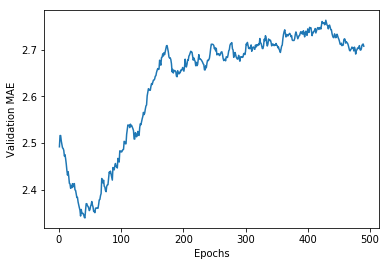

In [28]:
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

- The validation MAE stops improving significantly after 80 epochs. Past that point, we start overfitting. 

# Training the final model

Once we are finished tunig other parameters of the model, we can train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data.

In [32]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=2)

Epoch 1/80
 - 0s - loss: 475.2831 - mean_absolute_error: 19.6053
Epoch 2/80
 - 0s - loss: 291.1404 - mean_absolute_error: 14.5529
Epoch 3/80
 - 0s - loss: 130.4484 - mean_absolute_error: 9.0379
Epoch 4/80
 - 0s - loss: 55.6484 - mean_absolute_error: 5.4778
Epoch 5/80
 - 0s - loss: 34.7121 - mean_absolute_error: 4.2044
Epoch 6/80
 - 0s - loss: 26.9467 - mean_absolute_error: 3.6409
Epoch 7/80
 - 0s - loss: 23.2742 - mean_absolute_error: 3.3565
Epoch 8/80
 - 0s - loss: 20.5793 - mean_absolute_error: 3.1824
Epoch 9/80
 - 0s - loss: 18.2672 - mean_absolute_error: 2.9930
Epoch 10/80
 - 0s - loss: 16.9594 - mean_absolute_error: 2.9376
Epoch 11/80
 - 0s - loss: 15.3964 - mean_absolute_error: 2.7622
Epoch 12/80
 - 0s - loss: 14.3953 - mean_absolute_error: 2.6838
Epoch 13/80
 - 0s - loss: 13.8600 - mean_absolute_error: 2.6269
Epoch 14/80
 - 0s - loss: 12.8498 - mean_absolute_error: 2.5504
Epoch 15/80
 - 0s - loss: 12.2963 - mean_absolute_error: 2.4702
Epoch 16/80
 - 0s - loss: 11.8902 - mean_abs

In [33]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [34]:
test_mae_score

2.7000093740575455

We are still off by about \$2,700

# key Takeaways

- Regression is done using different loss functions than what we used for classification. Mean squared error (MSE) is a loss function commonly used for regression.
- Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).
- When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
- When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
- When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting. 

In [37]:
%load_ext version_information
%version_information keras, numpy, tensorflow, matplotlib

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.6.3 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.2.1
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
keras 2.0.9
numpy 1.12.1
tensorflow 1.3.0
matplotlib 2.0.0
Fri Dec 22 09:22:46 2017 CST